In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as lin

In [209]:
def f(x,i):
    return x * a[i] + c[i]
    

In [252]:

"""control factor of total number of lines!!"""
ss = 4                 # total line number
dens = 5               # point in dx is 1
l_lim = -20            # lower limit of grid
h_lim = 20             # upper limit of grid 
d_lim = h_lim - l_lim              ## do not need to change!!! # delta grid width

x = np.linspace(l_lim,h_lim,d_lim*dens)
y = np.ones((ss,d_lim*dens))


f_y = np.ones([ss,d_lim*dens])
f_y.size

800

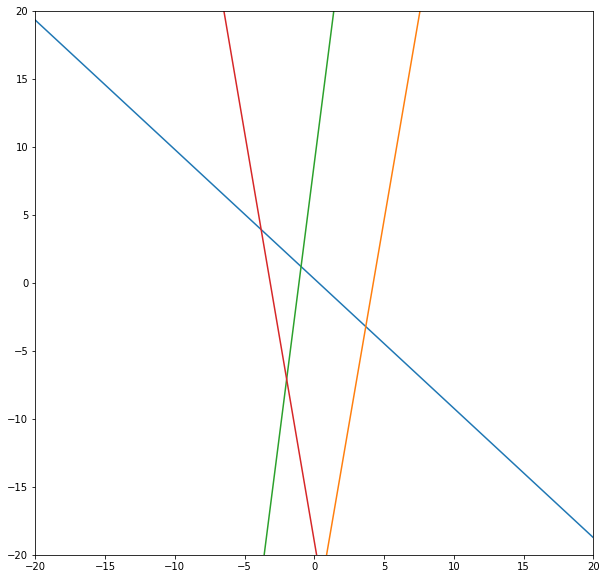

In [253]:
a = np.random.randn(ss,1) * 5
c =  np.random.randn(ss,1) * 20

for i in range(ss):
    f_y[i] = x
f_y = x * a + c

"""control total number of lines;;"""
k = ss

plt.figure(figsize=(10,10))
for i in range(k):
    plt.plot(x, f_y[i])
plt.ylim([l_lim,h_lim])
plt.xlim([l_lim,h_lim])
plt.show()

In [254]:
%%time

%time
xx, yy = np.meshgrid(x,x)
sol = np.zeros((d_lim*dens,d_lim*dens))
sol.size

for i in range(d_lim*dens):
    for j in range(d_lim*dens):
        sol[i][j] = (  (np.abs(a)/np.sqrt(a*a+1))  *  np.abs(xx[i,j]-((yy[i,j]/a)-c/a ))  ).sum()

ii = (sol.argmin() // (d_lim*dens))
print(ii)
jj = sol.argmin() - (d_lim*dens * ii) 



""" make the matrice of A"""
aa = np.ones((ss,2)).T
aa[0] = -a.reshape(1,-1)
A = aa.T

A_pse = lin.inv(np.dot(A.T,A))
ATA = np.dot(A_pse, A.T)
B = np.dot(ATA,c)
ans = np.array([x[jj], x[ii]])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs
105
CPU times: user 606 ms, sys: 1.77 ms, total: 608 ms
Wall time: 608 ms


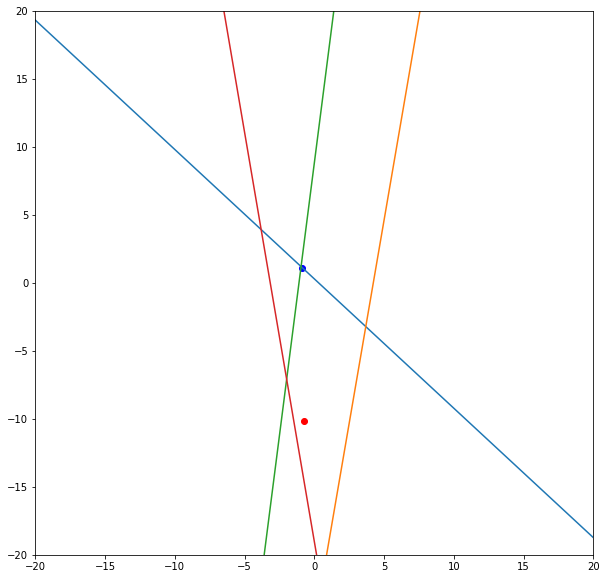

In [255]:

        


"""control total number of lines;;"""
k = ss

plt.figure(figsize=(10,10))
for i in range(k):
    plt.plot(x, f_y[i])
plt.ylim([l_lim,h_lim])
plt.xlim([l_lim,h_lim])
plt.scatter(B[0],B[1],color = "r")   # this is the linear least error point
plt.scatter(ans[0],ans[1], color = "b") # this is the real minimum that find by itteration.

plt.show()

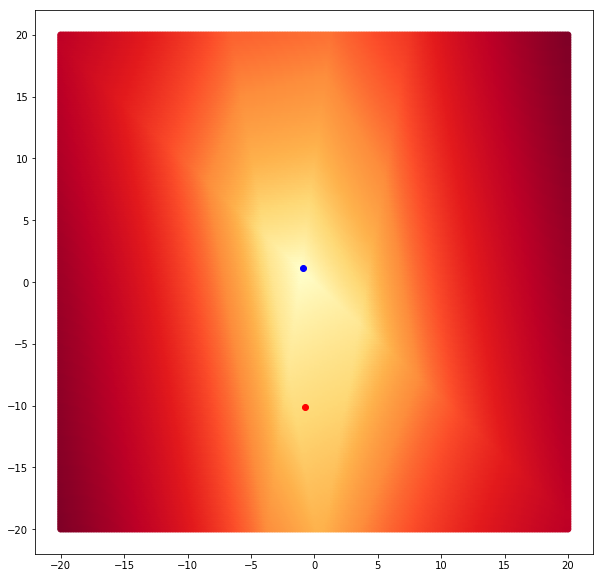

CPU times: user 1.88 s, sys: 31.2 ms, total: 1.91 s
Wall time: 1.9 s


In [256]:
%%time

cs = sol.argmin()//d_lim*dens
plt.figure(figsize=(10,10))
plt.scatter(xx,yy,c=np.log(sol),cmap="YlOrRd")
plt.scatter(B[0],B[1],color = "r")   # this is the linear least error point
plt.scatter(ans[0],ans[1], color = "b") # this is the real minimum that find by itteration.
plt.show()